![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [2]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

Once everything works, it'll look something like this:

In [4]:
df.columns=col_names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [5]:
df['native-country'].isnull().values.any()

False

In [6]:
df.groupby('workclass')['workclass'].count()

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64

In [7]:
df.groupby('occupation')['occupation'].count()

occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
Name: occupation, dtype: int64

In [8]:
df.groupby('native-country')['native-country'].count()

native-country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

In [9]:
# Results

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [143]:
# df3 = df.replace('?', np.nan)
# # df3.groupby('workclass')['workclass'].count()
# df3['workclass'].value_counts()
# df3.isnull().values.any()
# df3 = df3.dropna(subset=['workclass', 'occupation', 'native-country'])
# df3.info()
# df3.groupby('workclass')['workclass'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null category
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64

In [12]:
df3 = df.replace({
    'workclass': { '?': np.nan },
    'native-country': { '?': np.nan }
})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [144]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null category
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


In [13]:
df3.dropna(axis=0, how='any', inplace=True)

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30169 entries, 0 to 32560
Data columns (total 15 columns):
age               30169 non-null int64
workclass         30169 non-null object
fnlwgt            30169 non-null int64
education         30169 non-null object
education-num     30169 non-null int64
marital-status    30169 non-null object
occupation        30169 non-null object
relationship      30169 non-null object
race              30169 non-null object
sex               30169 non-null object
capital-gain      30169 non-null int64
capital-loss      30169 non-null int64
hours-per-week    30169 non-null int64
native-country    30169 non-null object
income            30169 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [16]:
# Provided:
df3['income'].value_counts()

<=50K    22661
>50K      7508
Name: income, dtype: int64

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [17]:
# My code:
income_cat = pd.Categorical(['<=50K', '>50K'],categories=['<=50K', '>50K'], ordered=True)

In [20]:
# My code:
df3.income = df3.income.astype(income_cat)
df3['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

In [19]:
# Expected result:
df['income'].dtype

dtype('O')

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [21]:
# My code:
dummy = pd.get_dummies(df3['income'])
dummy.head()
df3 = pd.concat([df3, dummy], axis=1)
df3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


In [21]:
# Expected result:

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


### Exercise: Plot a **distplot** showing the distribution of `age`.

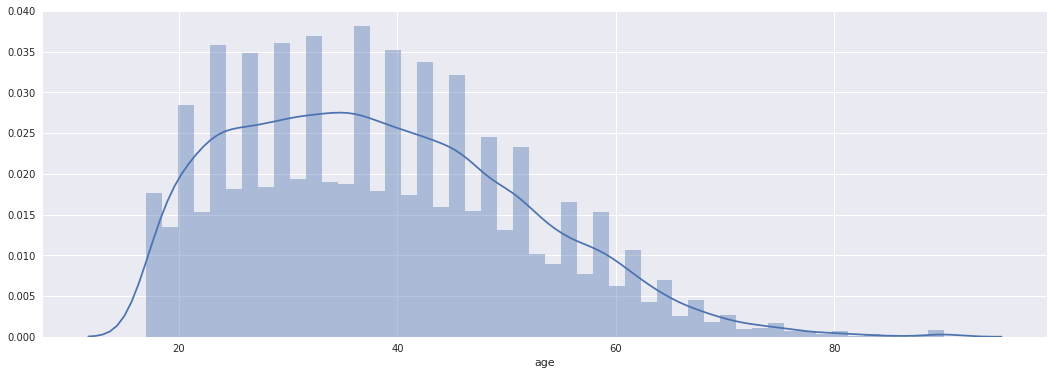

In [25]:
# My code:
sns.distplot(df3['age'])

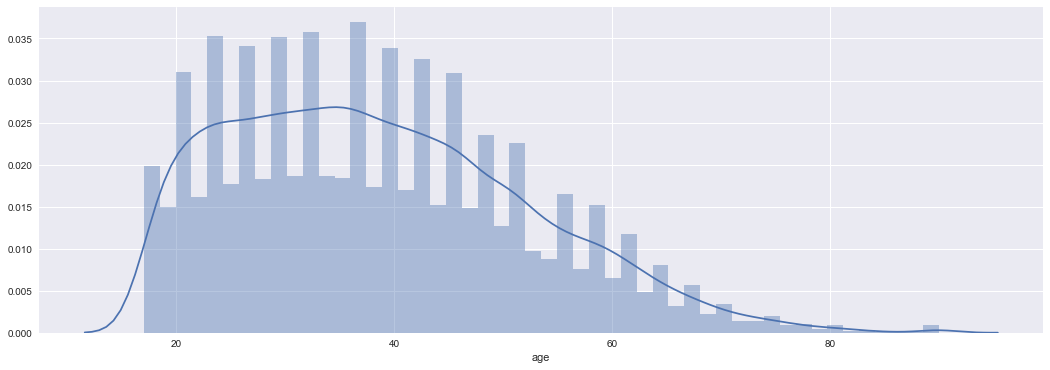

In [57]:
# Expected output

### Exercise: Plot a **boxplot** showing the distribution of `age`.

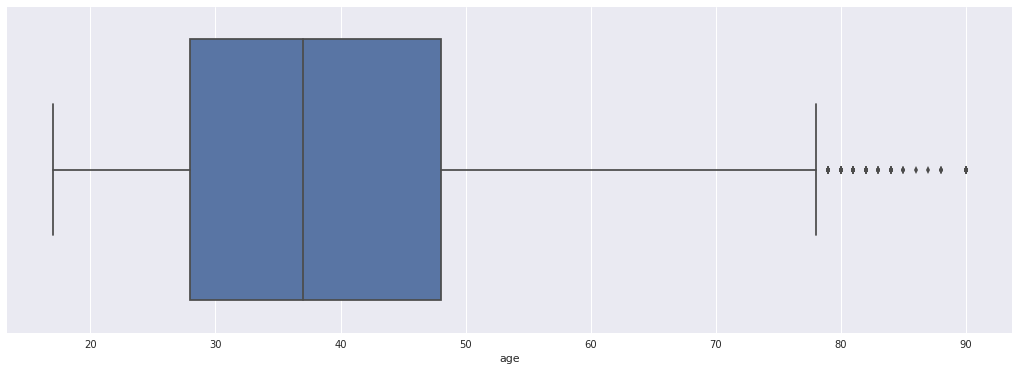

In [26]:
# My code
sns.boxplot(df['age'])

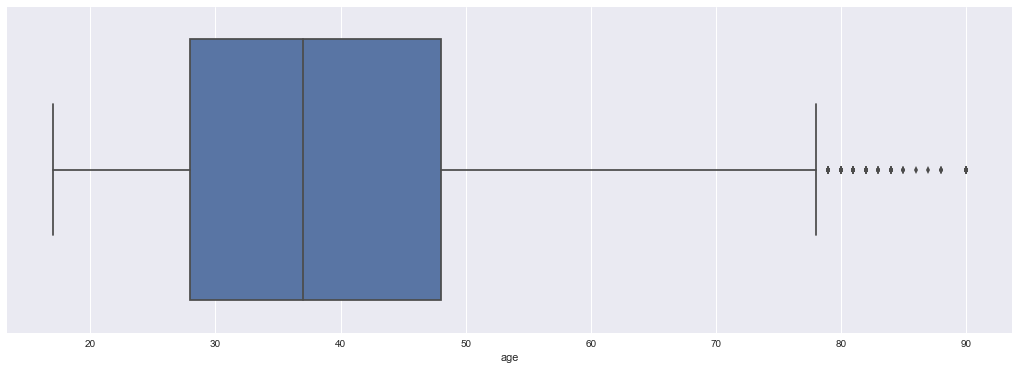

In [56]:
# Expected output

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

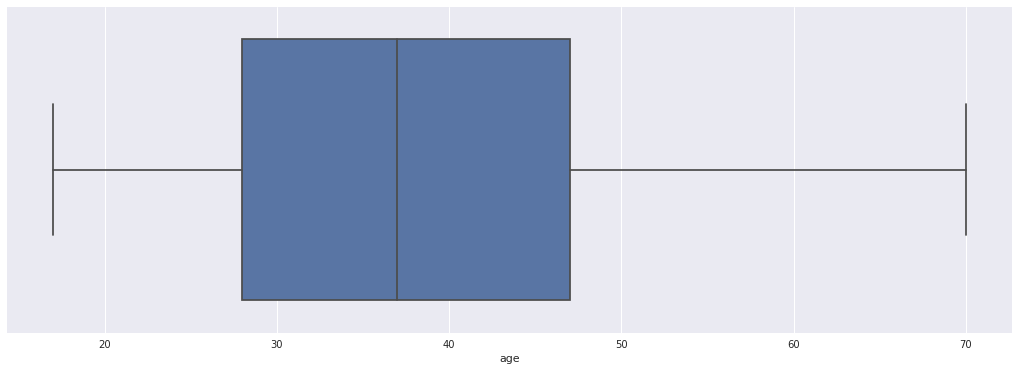

In [27]:
# My code
df3[df3['age']<=70].describe()
belowseventy = df3[df3['age']<=70]
# df3.describe()
sns.boxplot(belowseventy['age'])

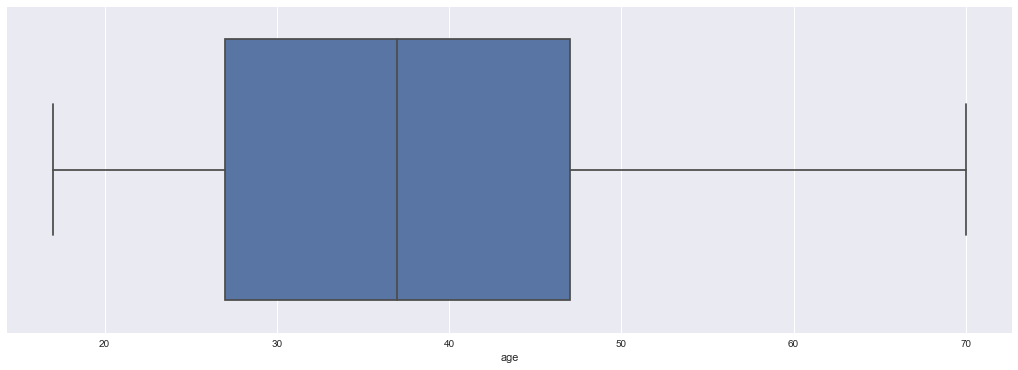

In [54]:
# Expected solution:

### Exercise: How many people work more than 20 hours per week?

In [28]:
df3.groupby('hours-per-week')['hours-per-week'].count()
# df3['hours-per-week'].isnull().values.any()
df3['hours-per-week'].dtype

dtype('int64')

In [31]:
df3.head()
# df3[df3['hours-per-week']>20]['hours-per-week'].count()
df3.loc[df3['hours-per-week'] > 20, 'hours-per-week'].count()

27779

In [22]:
# Expected output

29633

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [84]:
df3.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', '<=50K', '>50K'],
      dtype='object')

In [95]:
df3.groupby('sex')['sex'].count()

sex
Female     9782
Male      20380
Name: sex, dtype: int64

In [32]:
sex = df3['sex'].value_counts()
sex.Male
sex.Female
male_prop = float((sex.Male/(sex.Male+sex.Female)))
female_prop = float((sex.Female/(sex.Male+sex.Female)))

print('Male count: {} \nFemale count {} \nMale proportion: {} \nFemale proportion: {}'.format(sex.Male, sex.Female, male_prop, female_prop))

Male count: 20385 
Female count 9784 
Male proportion: 0.6756935927607809 
Female proportion: 0.32430640723921905


In [25]:
# Expected output

Male count: 21790
Female count: 10771
Male proportion: 0.6692054912318418
Female proportion: 0.33079450876815825


### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

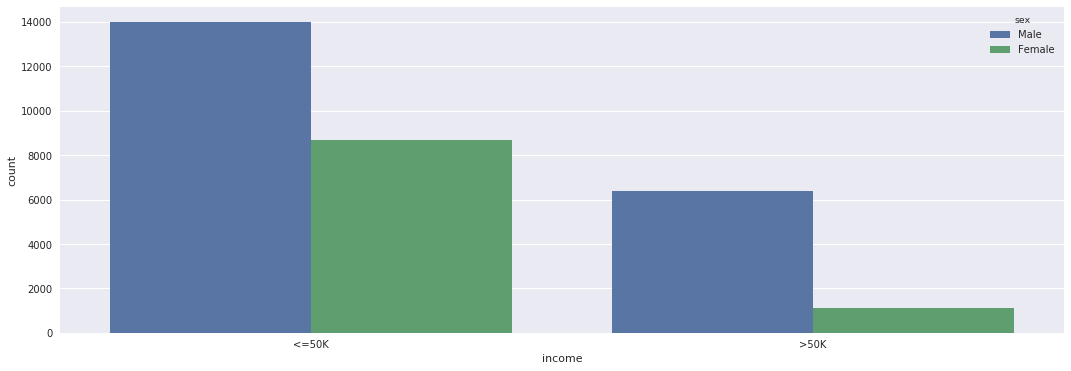

In [33]:
sns.countplot(x="income", hue='sex', data=df3)

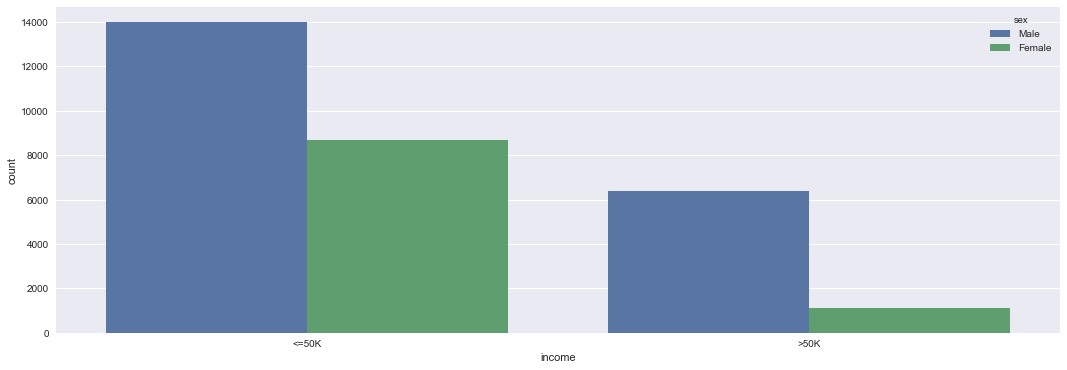

In [65]:
# Expected Result:

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

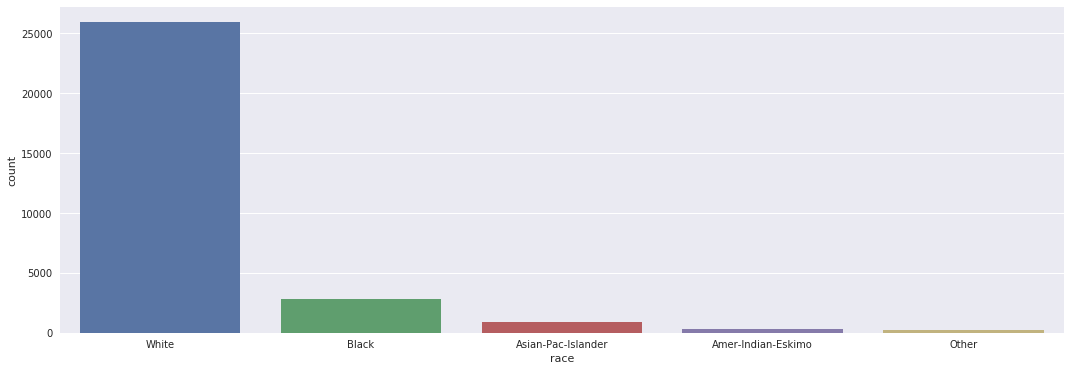

In [34]:
sns.countplot(data=df3, x='race')

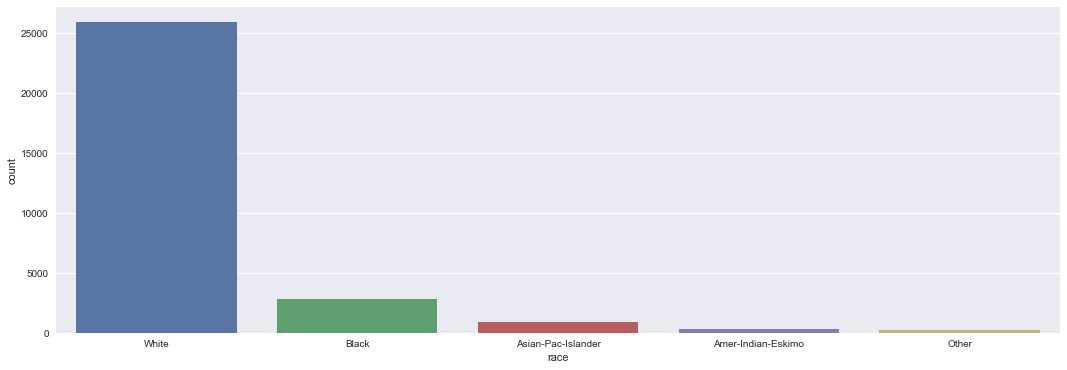

In [84]:
# Expected result

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [35]:
df3.groupby('race')['race'].count()

race
Amer-Indian-Eskimo      286
Asian-Pac-Islander      895
Black                  2819
Other                   231
White                 25938
Name: race, dtype: int64

In [18]:
# Expected result:

,race,count
0,Amer-Indian-Eskimo,311
1,Asian-Pac-Islander,1039
2,Black,3124
3,Other,271
4,White,27816


### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

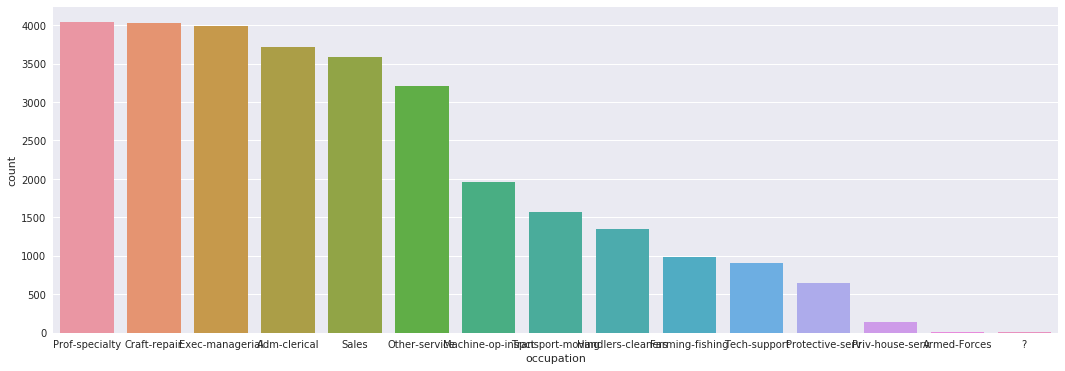

In [36]:
sns.countplot(data=df3, x='occupation', order = df3['occupation'].value_counts().index)

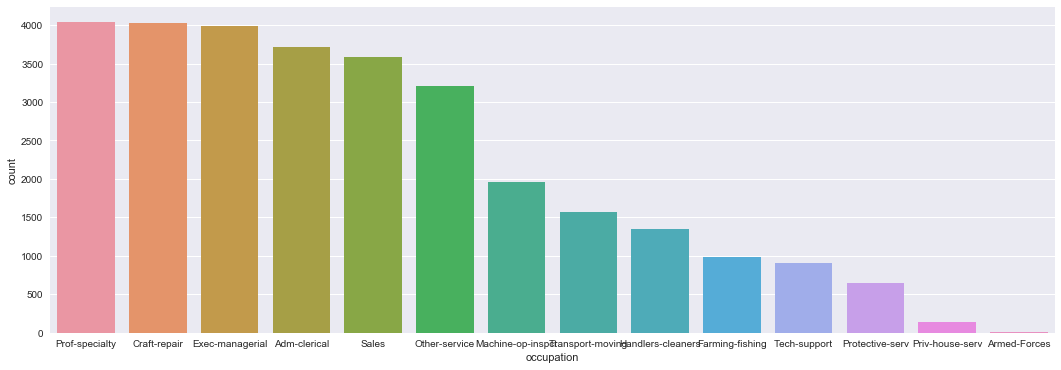

In [80]:
# Expected result:

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [37]:
df3['occupation'].value_counts().sort_values(ascending=False).to_frame()

# df.groupby('occupation').size().reset_index(name='count').set_index('occupation')

,occupation
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
Transport-moving,1572
Handlers-cleaners,1350
Farming-fishing,989


In [121]:
# Expected output

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

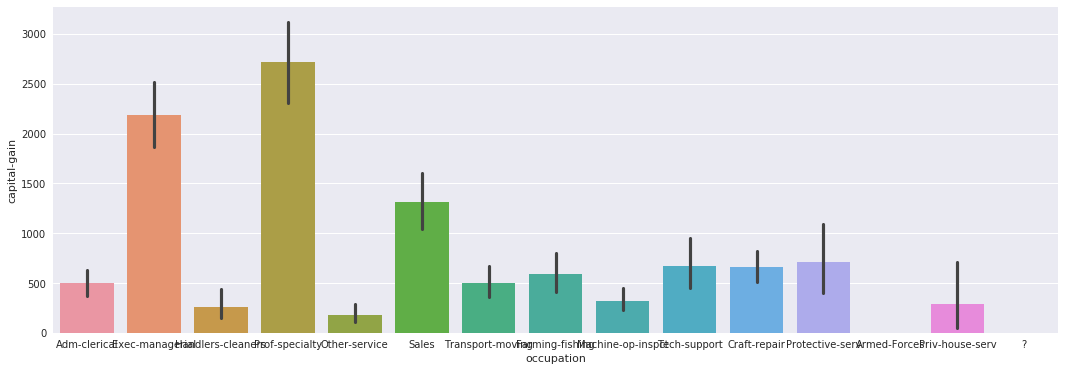

In [42]:
sns.barplot(data=df3, x='occupation', y='capital-gain', estimator=np.mean)

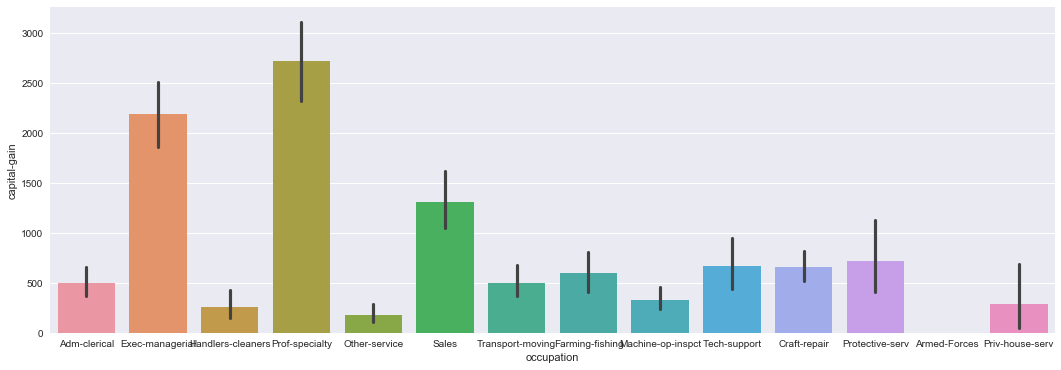

In [83]:
# Expected result:

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [110]:
# Expected result

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

In [41]:
df3['capital-gain'].groupby(df3['occupation']).aggregate(np.mean)

occupation
?                       0.000000
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

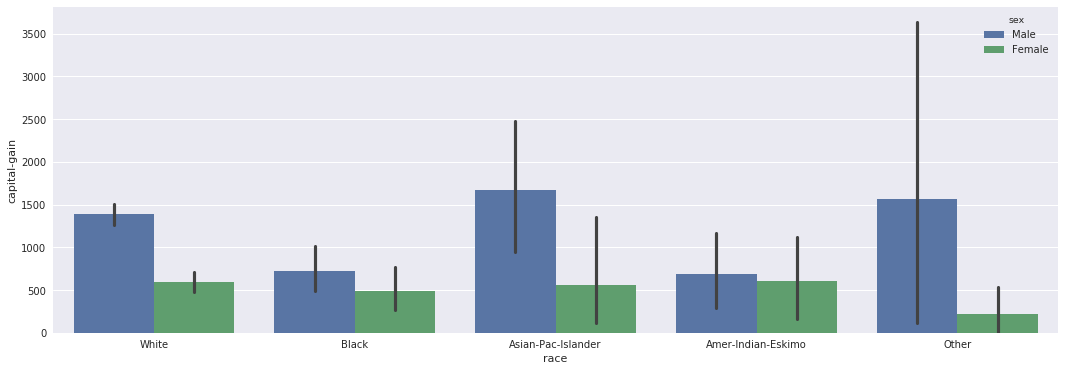

In [43]:
sns.barplot(data=df3, x='race', hue='sex', y='capital-gain', estimator=np.mean)

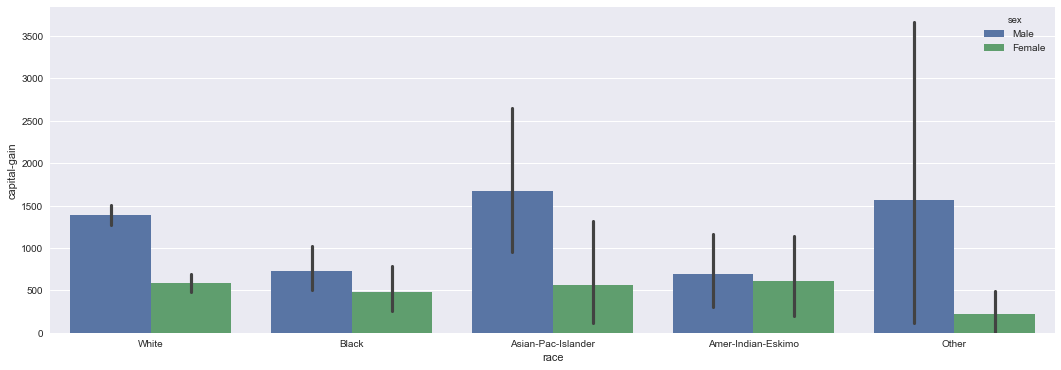

In [89]:
# Expected output

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [45]:
# df3['capital-gain'].groupby(df3['race'],df3['sex']).mean()
df3['capital-gain'].groupby([df3['race'], df3['sex']]).mean()

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.525000
                    Male       722.457364
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.775709
                    Male      1384.735395
Name: capital-gain, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)